In [1]:
import pandas as pd
import numpy as np

In [2]:
#Reading and displaying the dataset
dataset = pd.read_csv('beer_data.csv')
dataset.head()

,ABV,Ratings,Cellar Temperature,Score
0,7.5,1,40-45,4.08
1,5.3,22,40-45,3.82
2,9.0,1,45-50,4.03
3,4.6,1,35-40,4.00
4,6.9,1,45-50,3.75


In [12]:
#Dealing with categorical values
#Splitting the Celler Temperature into two columns as maximum temperature and minimum temperature
dataset['Minimum Cellar Temperature'] = dataset['Cellar Temperature'].apply(lambda x: int(x.split('-')[0].strip()))
dataset['Maximum Cellar Temperature'] = dataset['Cellar Temperature'].apply(lambda x: int(x.split('-')[1].strip()))
dataset = dataset.drop(['Cellar Temperature'],axis =1)

In [18]:
print(dataset.head())

   ABV  Ratings  Score  Minimum Cellar Temperature  Maximum Cellar Temperature
0  7.5        1   4.08                          40                          45
1  5.3       22   3.82                          40                          45
2  9.0        1   4.03                          45                          50
3  4.6        1   4.00                          35                          40
4  6.9        1   3.75                          45                          50


In [19]:
#Plotting a heatmap to check how different variables correlate with each other
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

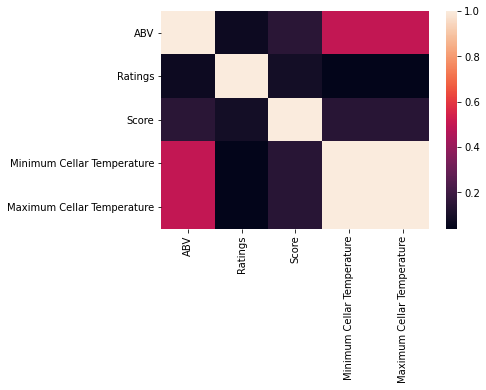

In [25]:
corr = dataset.corr()
sns.heatmap(corr)

In [26]:
#classifying dependent and independent variables
x = dataset[['ABV','Ratings','Minimum Cellar Temperature','Maximum Cellar Temperature']]
y = dataset['Score']

In [29]:
#split traing and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [30]:
#Training and fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(x_train,y_train)

In [31]:
#Predicting the score
y_predict = regressor.predict(x_test)
print('Predictions:',y_predict)

Predictions: [3.37884626 3.15370704 3.49328305 2.96474803 2.95454631 3.24249514
 3.31008762 2.88363126 3.29478504 3.18576712 3.02120225 3.24343168
 3.1076991  3.07418413 3.35790698 3.08115807 2.93049689 3.10890945
 3.11696429 3.32093715 3.65522119 2.89875482 3.04520748 2.98726911
 3.23042034 3.17650193 3.36208878 3.38138206 3.48505457 3.27368392
 3.21792737 3.16775509 3.26674492 3.48079007 2.98754292 3.118001
 3.14912454 3.37982699 4.24350136 3.2792379  3.22354659 3.20949854
 2.84712765 3.17275578 3.19148651 3.56489548 3.56832363 3.23552121
 2.93778882 3.06908327 2.93081489 3.10395295 3.95168978 3.0480998
 3.20949854 3.01356559 2.9517367  3.25134215 3.57884336 3.22157333
 3.15880791 2.99840737 3.10301642 3.16001825 2.88803473 3.00940126
 3.18628547 2.95871063 3.06238314 3.60299295 2.97140397 3.03249668
 3.25747973 3.25888222 2.79039962 3.20668892 3.07726755 3.26965471
 2.91686702 3.24530475 3.81314758 2.93872536 3.23468485 3.22761073
 3.17369232 3.20491603 3.20668892 3.20949854 3.23010

In [32]:
def rmlse(y_test, y_pred):
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    score = 1 - error
    return error, score

error, score = rmlse(y_test, y_predict)

print("\n",'-'*40)
print("RMLSE : ", error)
print("Score : ", score)


 ----------------------------------------
RMLSE :  0.22404975319531314
Score :  0.7759502468046868
